In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/02.Data/'
SEED = 42

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv(f"{DATA_PATH}imdb.csv")
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     748 non-null    object
 1   sentiment  748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [ ]:
df["sentiment"].mean() # 긍정, 부정의 비율

0.516042780748663

```
50%의 비율을 보인다. 이럴때 어떻게 처리해야 할까?
review에 대한 자연어를 처리해야한다!
```

# 자연어처리(Natual Language Processing)
- 자연어 이해
    - 읽기
- 자연어 생성
    - 사람으로 치자면, 쓰기 & 말하기
    - 어떠한 2차원 데이터를 보고 자연어를 만드는것
    - ex) 번역, 챗봇

# 단어문서행렬(Term Document Matrix)
- 문서별로 단어의 빈도를 정리한 표

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=100, stop_words='english')

tdm = cv.fit_transform(df["review"])
tdm

<748x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1775 stored elements in Compressed Sparse Row format>

In [ ]:
tdm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#단어 목록 확인하기
cv.get_feature_names()[:50]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10',
 'acting',
 'actor',
 'actors',
 'actually',
 'art',
 'awful',
 'bad',
 'beautiful',
 'best',
 'better',
 'big',
 'black',
 'boring',
 'camera',
 'cast',
 'character',
 'characters',
 'cinematography',
 'definitely',
 'dialogue',
 'did',
 'didn',
 'director',
 'doesn',
 'don',
 'drama',
 'effects',
 'end',
 'ending',
 'excellent',
 'feeling',
 'film',
 'films',
 'funny',
 'game',
 'going',
 'good',
 'great',
 'highly',
 'interesting',
 'job',
 'just',
 'know',
 'life',
 'like',
 'liked',
 'line',
 'little',
 'look']

In [ ]:
tdm_df = pd.DataFrame(tdm.toarray(),columns=cv.get_feature_names())
tdm_df

,10,acting,actor,actors,actually,art,awful,bad,beautiful,best,...,watch,watching,way,wonderful,work,worse,worst,worth,writing,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#단어 목록 확인하기
cv.get_feature_names()[:50]

# 빈도수 확인하기
tdm.sum(axis=0)

# DataFrame 형태로 만들어주기
word_count=pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
word_count.sort_values("빈도",ascending=False).head(10)

,단어,빈도
54,movie,182
32,film,163
7,bad,71
42,just,63
37,good,58
45,like,48
85,time,43
1,acting,43
38,great,41
66,really,41


In [ ]:
tdm_df.sum().to_dict()

{'10': 29,
 'acting': 43,
 'actor': 10,
 'actors': 19,
 'actually': 10,
 'art': 13,
 'awful': 14,
 'bad': 71,
 'beautiful': 11,
 'best': 25,
 'better': 18,
 'big': 10,
 'black': 10,
 'boring': 10,
 'camera': 10,
 'cast': 18,
 'character': 24,
 'characters': 35,
 'cinematography': 10,
 'definitely': 9,
 'dialogue': 13,
 'did': 11,
 'didn': 22,
 'director': 12,
 'doesn': 12,
 'don': 26,
 'drama': 10,
 'effects': 9,
 'end': 11,
 'ending': 11,
 'excellent': 16,
 'feeling': 10,
 'film': 163,
 'films': 24,
 'funny': 19,
 'game': 9,
 'going': 10,
 'good': 58,
 'great': 41,
 'highly': 10,
 'interesting': 12,
 'job': 9,
 'just': 63,
 'know': 14,
 'life': 12,
 'like': 48,
 'liked': 10,
 'line': 12,
 'little': 17,
 'look': 19,
 'love': 22,
 'loved': 10,
 'make': 22,
 'man': 13,
 'movie': 182,
 'movies': 29,
 'music': 14,
 'people': 14,
 'performance': 12,
 'piece': 10,
 'played': 10,
 'plot': 28,
 'predictable': 10,
 'pretty': 13,
 'quite': 10,
 'real': 21,
 'really': 41,
 'recommend': 13,
 'righ

# 단어구름 만들어 시각화해보기

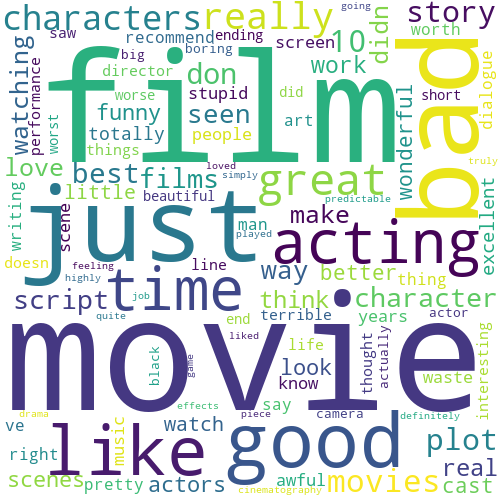

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white',width=500,height=500)
cloud = wc.generate_from_frequencies(tdm_df.sum().to_dict()) # 딕셔너리형태로 넣기
cloud.to_image()

# TF-IDF
- 단어 빈도(TF)와 역문서빈도(IDF)를 곱한 값
- 단어 빈도에 가중치를 주는 방법
- 문서빈도(DF) : 각 단어가 등장한 문서의 수
- 역문서빈도(IDF) : 총 문서를 DF로 나눈 값
```
IDF값이 높을수록 좋은단어다!
```

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')
tf = tv.fit_transform(df['review'])
tf

<748x100 sparse matrix of type '<class 'numpy.float64'>'
	with 1775 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(tf.toarray(),columns=tv.get_feature_names_out())

,10,acting,actor,actors,actually,art,awful,bad,beautiful,best,...,watch,watching,way,wonderful,work,worse,worst,worth,writing,years
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.402595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.618573,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.785154,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
744,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.652005,0.0,0.0,0.0,0.0,0.0
745,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
746,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


# 토큰화(tokenization)
- 자연어 처리를 위해 문장을 처리하기 위한 단위인 토큰으로 분리하는것

In [ ]:
from torchtext.data.utils import get_tokenizer
gt = get_tokenizer("basic_english")
# get_tokenizer(lambda x:x.split(" "))

In [ ]:
gt("i love you")

['i', 'love', 'you']

- 어휘집 만들기(단어사전)

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

In [ ]:
def yield_token(data,tokenizer):
    for text in data:
        yield tokenizer(text)

- padding
    - 문자열의 길이를 맞추기위해 채워주는것
- OOV(Out-Of-Vocabulary)
    - 모르는 새 단어가 나왔을때 특정 숫자를 부여(대부분 1)

In [ ]:
gen = yield_token(df["review"],gt)
vocab = build_vocab_from_iterator(gen,specials=['<pad>','<unk>'])
vocab.set_default_index(vocab["<unk>"])

In [ ]:
vocab["<unk>"]

1

In [ ]:
len(vocab)# 단어사전에 있는 단어 개수

3146

In [ ]:
vocab(["a","very","karns"]) # karns를 정수 인코딩함

[6, 34, 1]

In [ ]:
vocab.lookup_tokens([6,34,1,0]) # 디코딩

['a', 'very', '<unk>', '<pad>']

- 학습 및 정답데이터 만들기

In [ ]:
train = [ vocab(gt(text)) for text in df['review'].tolist()]
target = df.sentiment.to_numpy()
len(train), target.shape

(748, (748,))

In [ ]:
import torch
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import random # 시드 고정을 위해
import os # 시드 고정을 위해
SEED = 42
device = 'cuda' if torch.cuda.is_available() else 'cpu'
def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)    # 파이썬 환경변수 시드 고정
    np.random.seed(seed)
    torch.manual_seed(seed) # cpu 연산 무작위 고정
    torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정
    torch.backends.cudnn.deterministic = True  # cuda 라이브러리에서 Deterministic(결정론적)으로 예측하기 (예측에 대한 불확실성 제거 )

In [ ]:
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self,x,y=None):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)
    
    def __getitem__(self,idx):
        item = {}
        item["x"] = self.x[idx]
        if self.y is not None:
            item["y"] = self.y[idx]
        return item

In [ ]:
dt = ReviewDataset(train,target)
dt[0]

{'x': [6,
  34,
  4,
  34,
  4,
  34,
  2741,
  4,
  1263,
  16,
  44,
  6,
  1688,
  4,
  1709,
  524,
  155,
  2],
 'y': 0}

- collate_fn

In [ ]:
def collate_fn(samples):
    x = [ torch.LongTensor(sample["x"]) for sample in samples ] # int64 형태의 LongTensor
    y = [ sample["y"] for sample in samples ]
    y = torch.Tensor(y).view(-1,1) # 2차원으로 view~
    x = torch.nn.utils.rnn.pad_sequence(x,batch_first=True)

    return {"x":x, "y":y}

In [ ]:
dl = torch.utils.data.DataLoader(dt,shuffle=False,batch_size = 8,collate_fn=collate_fn)

In [ ]:
batch = next(iter(dl))

# 단어 임베딩(embedding)
- 단어를 실수 형태의 벡터로 표현
- 신경망에서 임베딩 레이어를 추가하여 단어에 임베딩을 얻을 수 있음.

- num_embeddings
    - 임베딩할 단어의 개수
- embedding_dim
    - 단어마다 임베딩할 벡터의 차원


In [ ]:
emb_layer = torch.nn.Embedding(len(vocab), 4)
x = emb_layer(batch["x"])
x.shape

torch.Size([8, 33, 4])

In [ ]:
emb_layer.weight.shape

torch.Size([3146, 4])

In [ ]:
np.array(train,dtype="object")[[2,3,4]]

array([list([1319, 1306, 26, 198, 216, 264, 5, 352, 244, 753, 4, 3, 16, 304, 70, 769, 59, 71, 387, 70, 24, 3, 54, 15, 329, 5, 3, 80, 5, 280, 218, 2357, 2]),
       list([34, 125, 144, 58, 241, 13, 690, 7, 2]),
       list([3, 85, 147, 14, 3, 16, 15, 77, 1934, 8, 513, 13, 202, 6, 497, 17, 963, 1085, 214, 51, 927, 2])],
      dtype=object)

In [ ]:
class RNNModel(torch.nn.Module):
    def __init__(self,vocab_size,embedding_dim):
        super().__init__()
        self.emb_layer = torch.nn.Embedding(vocab_size,embedding_dim)
        self.gru_layer = torch.nn.GRU(embedding_dim,embedding_dim//2, batch_first=True)
        self.relu = torch.nn.ReLU()
        self.output_layer = torch.nn.Linear(embedding_dim//2,1)

    def forward(self,x):
        x = self.emb_layer(x)
        _, x = self.gru_layer(x)
        x = x.squeeze(dim=0)
        x = self.relu(x)
        x = self.output_layer(x)
        return x

In [ ]:
model = RNNModel(len(vocab),32)
model(batch["x"])

tensor([[0.5032],
        [0.5030],
        [0.1757],
        [0.5034],
        [0.5026],
        [0.4365],
        [0.5034],
        [0.5033]], grad_fn=<AddmmBackward0>)

In [ ]:
def train_loop(dataloader,model,loss_fn,optimizer,device):
    epoch_loss = 0 # 미니배치별에 대한 loss들의 평균
    model.train()  # 학습모드
    for batch in dataloader:
        pred = model(batch["x"].to(device))
        #pred = pred.squeeze()
        loss = loss_fn(pred,batch["y"].to(device))

        optimizer.zero_grad()
        loss.backward() # 손실에 대한 반영
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(dataloader)
    
    return epoch_loss

In [ ]:
@torch.no_grad()
def test_loop(dataloader,model,loss_fn,device):
    epoch_loss = 0  # 미니배치별에 대한 loss들의 평균
    model.eval()    # 평가모드

    pred_list = [] # 내보내야할 예측값
    for batch in dataloader:
        pred = model(batch["x"].to(device))

        # y값이 None일경우
        if batch.get("y") is not None:
            loss = loss_fn(pred,batch["y"].to(device))
            epoch_loss += loss.item()

        pred = pred.to("cpu").numpy()
        pred_list.append(pred)

    epoch_loss /= len(dataloader)

    pred = np.concatenate(pred_list)
    return epoch_loss,pred

In [ ]:
n_splits = 5
vocab_size = len(vocab)
embedding_dim = 4
batch_size = 32
epochs = 100
loss_fn = torch.nn.BCEWithLogitsLoss()

In [ ]:
x_arr = np.array(train,dtype="object")

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=n_splits,shuffle=True, random_state=SEED)

In [ ]:
is_holdout = True

reset_seeds(SEED)
# best_score_list = []
for tri,vai in cv.split(x_arr):
    model = RNNModel(vocab_size,embedding_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters())

    # dataset
    train_dt = ReviewDataset(x_arr[tri],target[tri])
    valid_dt = ReviewDataset(x_arr[vai],target[vai])
    # dataloader
    train_dl = torch.utils.data.DataLoader(train_dt,batch_size=batch_size,shuffle=True,collate_fn=collate_fn)
    valid_dl = torch.utils.data.DataLoader(valid_dt,batch_size=batch_size,shuffle=False,collate_fn=collate_fn)
    
    
    for e in range(epochs):
        train_loss = train_loop(train_dl, model, loss_fn, optimizer, device)
        valid_loss,pred = test_loop(valid_dl,model,loss_fn,device)
        pred =(pred > 0.5).astype(int)
        print(train_loss,valid_loss, accuracy_score(target[vai],pred))

    if is_holdout:
        break

        

0.6956381515452736 0.695993971824646 0.5066666666666667
0.6973103598544472 0.6953954219818115 0.5066666666666667
0.6943917211733366 0.6947776794433593 0.5066666666666667
0.6921380162239075 0.6945487856864929 0.5066666666666667
0.6919231132457131 0.6946782469749451 0.5066666666666667
0.6947229881035654 0.6947031259536743 0.5066666666666667
0.6922948391813981 0.6947212219238281 0.5066666666666667
0.6942688571779352 0.6946846961975097 0.5066666666666667
0.6948848209883037 0.6942624926567078 0.5066666666666667
0.6918575951927587 0.6942118883132935 0.5066666666666667
0.6917250407369513 0.694302749633789 0.5066666666666667
0.6928349325531408 0.6942978620529174 0.5066666666666667
0.6930821820309288 0.6940463185310364 0.5066666666666667
0.6929994664694133 0.6940320253372192 0.5066666666666667
0.6923307023550335 0.6940361857414246 0.5066666666666667
0.6915412294237238 0.6941760659217835 0.5066666666666667
0.6923908559899581 0.6940578341484069 0.5066666666666667
0.6941751367167422 0.693658936023